In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load dataset (replace 'Ethereum_Historical_Data.csv' with your actual dataset path)
df = pd.read_csv(r'C:\Users\dinhn\Downloads\Ethereum_Historical_Data.csv', on_bad_lines='skip', low_memory=False)

# Sort by date if necessary
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Extract date and price columns
dates = df.index
prices = df['Price'].values

# Split dataset into training and testing sets (70:30)
split_index = int(len(df) * 0.7)
train_df, test_df = df.iloc[:split_index], df.iloc[split_index:]

# Define the Nonlinear Model function (example using a quadratic function)
def model_function(beta, x):
    return beta[0] * x**2 + beta[1] * x + beta[2]

# Implement Gauss-Newton Method to fit the model
def gauss_newton(x, y, beta_initial, max_iter=100, tol=1e-6):
    beta = beta_initial.copy()
    for _ in range(max_iter):
        # Predicted values
        y_pred = model_function(beta, x)
        
        # Residuals
        residuals = y - y_pred
        
        # Jacobian matrix (partial derivatives of model function)
        J = np.zeros((len(x), len(beta)))
        J[:, 0] = x**2
        J[:, 1] = x
        J[:, 2] = 1
        
        # Gauss-Newton step
        Jt = J.T
        H = np.dot(Jt, J)
        g = np.dot(Jt, residuals)
        delta = np.linalg.solve(H, g)
        
        # Update parameters
        beta += delta
        
        # Check convergence
        if np.linalg.norm(delta) < tol:
            break
    
    return beta

# Prepare data for training and testing
x_train = np.arange(len(train_df))
y_train = train_df['Price'].values
x_test = np.arange(len(train_df), len(df))
y_test = test_df['Price'].values

# Example usage
beta_initial = np.array([1.0, 1.0, 1.0])  # Initial guess for parameters [a, b, c]

# Fit the model using Gauss-Newton on the training set
beta_opt_train = gauss_newton(x_train, y_train, beta_initial)

# Predict values for training period
train_predictions = model_function(beta_opt_train, x_train)

# Predict values for testing period
test_predictions = model_function(beta_opt_train, x_test)

In [2]:
# Calculate evaluation metrics for test dataset
test_mse = mean_squared_error(y_test, test_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

# Print evaluation metrics
print(f"MSE on Test dataset: {test_mse}")
print(f"MAPE on Test dataset: {test_mape}")
print(f"RMSE on Test dataset: {test_rmse}")


MSE on Test dataset: 784174.0136689353
MAPE on Test dataset: 0.450198540368779
RMSE on Test dataset: 885.5360035983491


<h2> Predict next 30 days </h2>

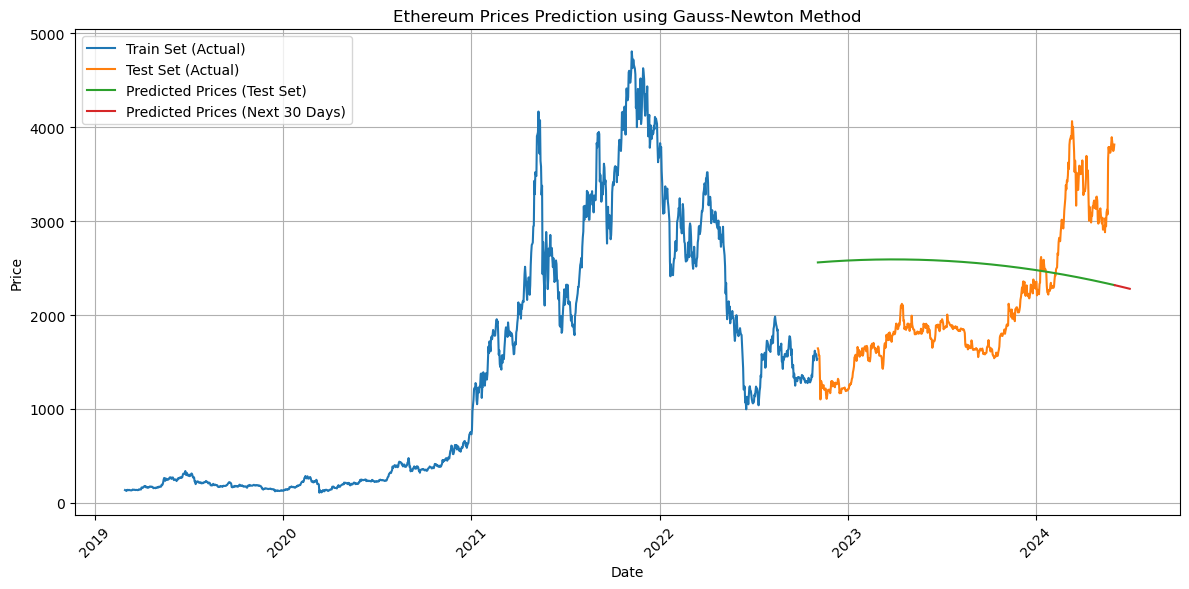

In [3]:
# Predict next 30 days
future_days = np.arange(len(df), len(df) + 30)  # Assuming predictions start after the last data point
future_predictions = model_function(beta_opt_train, future_days)

# Visualize
plt.figure(figsize=(12, 6))

# Plot actual prices for training period
plt.plot(train_df.index, train_df['Price'], label='Train Set (Actual)')

# Plot actual prices for testing period
plt.plot(test_df.index, test_df['Price'], label='Test Set (Actual)')

# Plot predicted prices for testing period
plt.plot(test_df.index, test_predictions, label='Predicted Prices (Test Set)')

# Plot future predictions
future_dates = pd.date_range(start=dates[-1] + pd.DateOffset(days=1), periods=30)
plt.plot(future_dates, future_predictions, label='Predicted Prices (Next 30 Days)')

plt.title('Ethereum Prices Prediction using Gauss-Newton Method')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2> Predict next 60 days </h2>

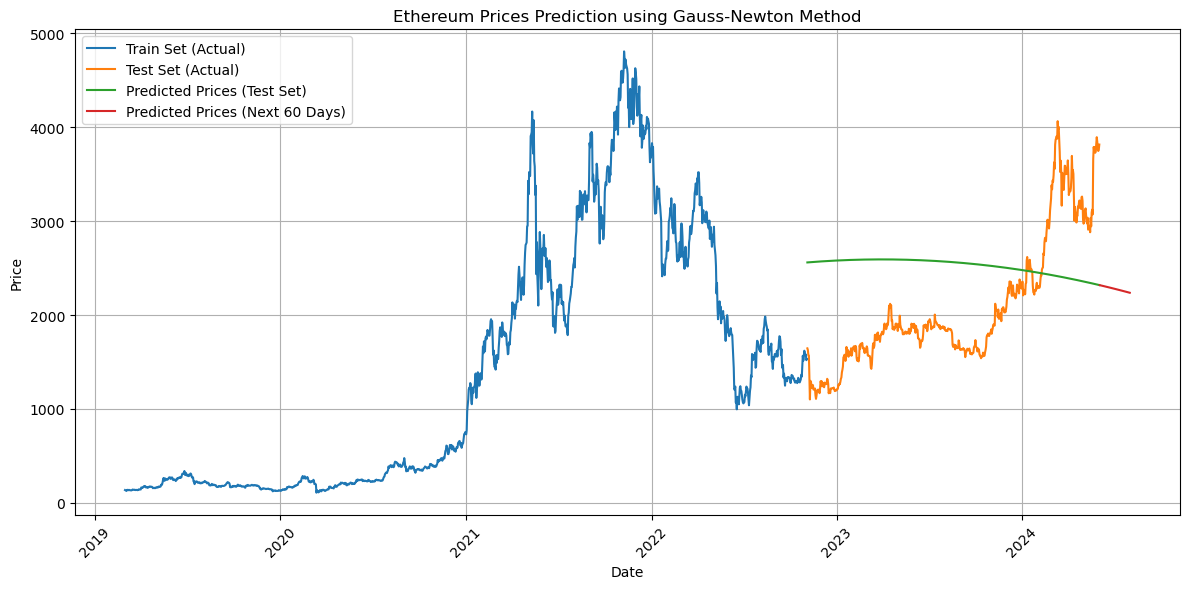

In [4]:
# Predict next 60 days
future_days = np.arange(len(df), len(df) + 60)  # Assuming predictions start after the last data point
future_predictions = model_function(beta_opt_train, future_days)

# Visualize
plt.figure(figsize=(12, 6))

# Plot actual prices for training period
plt.plot(train_df.index, train_df['Price'], label='Train Set (Actual)')

# Plot actual prices for testing period
plt.plot(test_df.index, test_df['Price'], label='Test Set (Actual)')

# Plot predicted prices for testing period
plt.plot(test_df.index, test_predictions, label='Predicted Prices (Test Set)')

# Plot future predictions
future_dates = pd.date_range(start=dates[-1] + pd.DateOffset(days=1), periods=60)
plt.plot(future_dates, future_predictions, label='Predicted Prices (Next 60 Days)')

plt.title('Ethereum Prices Prediction using Gauss-Newton Method')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2> Predict next 90 days </h2>


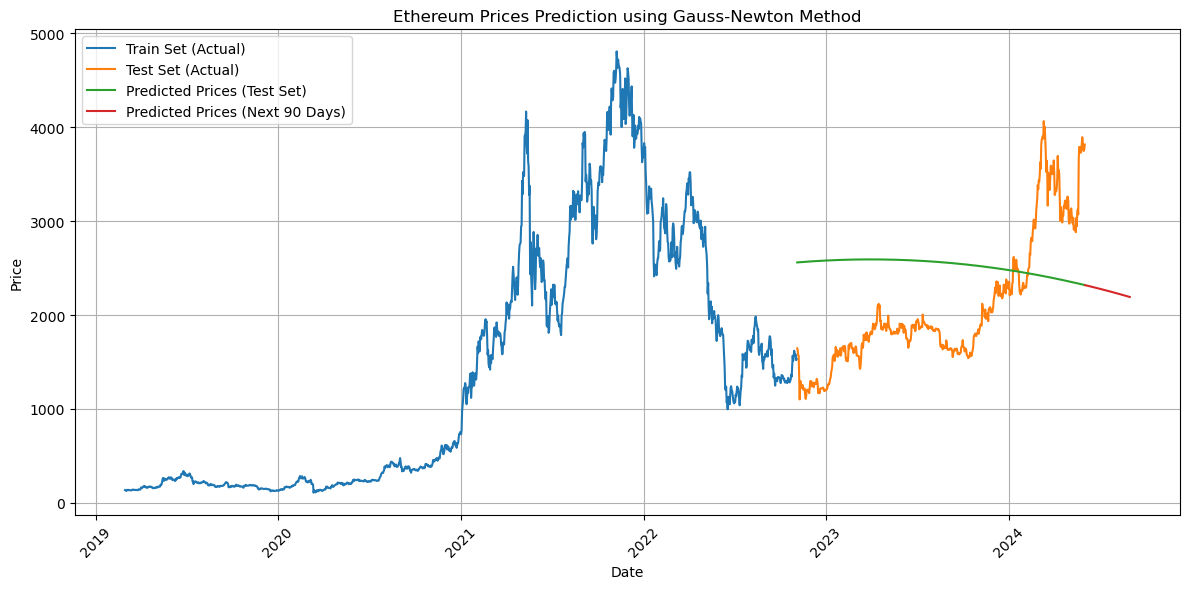

In [5]:
# Predict next 90 days
future_days = np.arange(len(df), len(df) + 90)  # Assuming predictions start after the last data point
future_predictions = model_function(beta_opt_train, future_days)

# Visualize
plt.figure(figsize=(12, 6))

# Plot actual prices for training period
plt.plot(train_df.index, train_df['Price'], label='Train Set (Actual)')

# Plot actual prices for testing period
plt.plot(test_df.index, test_df['Price'], label='Test Set (Actual)')

# Plot predicted prices for testing period
plt.plot(test_df.index, test_predictions, label='Predicted Prices (Test Set)')

# Plot future predictions
future_dates = pd.date_range(start=dates[-1] + pd.DateOffset(days=1), periods=90)
plt.plot(future_dates, future_predictions, label='Predicted Prices (Next 90 Days)')

plt.title('Ethereum Prices Prediction using Gauss-Newton Method')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
